## Data Info: 

1.Payload-Describes the loaded cargo.

2.Reliability-Probability of this route to be on time according to historical data.

3.Season-Describes the weather condition. 0 is good weather and 1 is bad weather

4.Net-This is a discrete quantitative variable that describes the quality of the roadnet. 1 is bad quality, 2 is mediocre and 3 is good quality

5.Fuel-The dependent variable. It is describing the fuel consumption of a truck when doing this route

6.LoadValue-This is the value of the cargo of the truck.

7.TransmissionType-Truck can have automatic or manual transmission.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
%matplotlib inline


## Loading Dataset

In [2]:
df= pd.read_csv('stacking.csv')
df_copy=df.copy()

In [3]:
df

Unnamed: 0     Payload  Reliability  Season  Net       Fuel  \
0              0  268.003362    88.942169       0    3  13.033955   
1              1  270.695677    86.018913       0    3  12.843801   
2              2  268.346849    85.945960       0    3  12.500423   
3              3  253.712697    87.986605       0    3  11.987058   
4              4  240.949546    83.871310       0    3  12.248381   
...          ...         ...          ...     ...  ...        ...   
4488        4488  286.650265    48.145788       1    1  20.499798   
4489        4489  284.634296    52.040528       1    1  22.343000   
4490        4490  287.683624    53.786202       1    1  21.203045   
4491        4491  294.161289    53.788311       1    1  21.763259   
4492        4492  296.659754    53.726080       1    1  22.570595   

        LoadValue TransmissionType  
0     1130.150394        automatic  
1     1137.342936           manual  
2     1319.950261        automatic  
3     1662.979622        automatic  
4     1674.107415           manual  
...           ...              ...  
4488   480.183149        automatic  
4489   395.812446           manual  
4490   694.418270           manual  
4491   621.569829           manual  
4492   556.507547           manual  

[4493 rows x 8 columns]

## Data Statistics

In [4]:
df.shape

(4493, 8)

In [5]:
df.describe()

Unnamed: 0      Payload  Reliability       Season          Net  \
count  4493.000000  4493.000000  4493.000000  4493.000000  4493.000000   
mean   2246.000000   284.053496    70.184271     0.146227     2.380147   
std    1297.161709    12.344016     6.665746     0.353373     0.557214   
min       0.000000   228.025383    48.145788     0.000000     1.000000   
25%    1123.000000   276.898803    65.418693     0.000000     2.000000   
50%    2246.000000   286.560013    70.238216     0.000000     2.000000   
75%    3369.000000   293.842742    74.921809     0.000000     3.000000   
max    4492.000000   299.999307    90.315143     1.000000     3.000000   

              Fuel    LoadValue  
count  4493.000000  4493.000000  
mean     16.508160   854.382437  
std       1.846029   249.432115  
min      11.298344   152.690191  
25%      15.169328   674.397696  
50%      16.442109   830.769184  
75%      17.773924  1010.278817  
max      23.335635  1967.946647

**1.most of the times the weather is good.**

**2.roadnet is either mediocre or good.**

**3.loadvalue has high spread of values comparitively.**

In [6]:
df.isnull().sum()

Unnamed: 0          0
Payload             0
Reliability         0
Season              0
Net                 0
Fuel                0
LoadValue           0
TransmissionType    0
dtype: int64

**1.No null values**

In [7]:
df.dtypes

Unnamed: 0            int64
Payload             float64
Reliability         float64
Season                int64
Net                   int64
Fuel                float64
LoadValue           float64
TransmissionType     object
dtype: object

**1.only one categorical variable.**

In [8]:
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

## Data Visualization

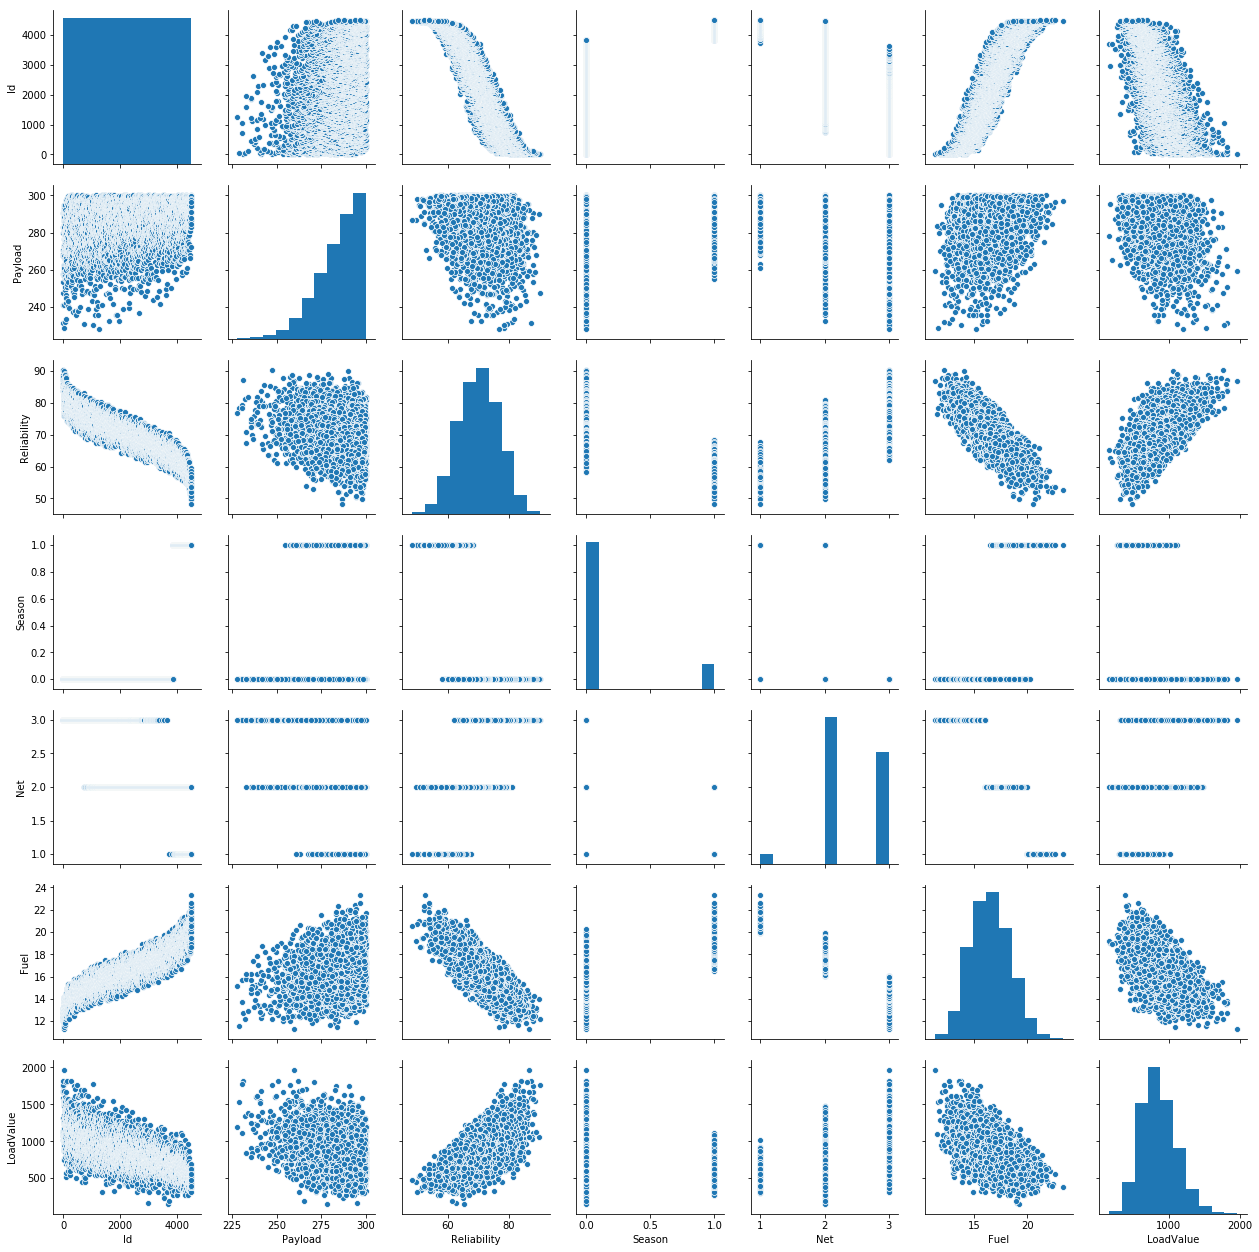

In [9]:
sns.pairplot(df)

In [10]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

In [11]:
px.scatter(df,x=df['Reliability'],y=df['Fuel'],color=df['Season'],title='Fuel Vs reliability')

**1.When season is bad ,reliability is less and the fuel consumption is more.**

In [12]:
px.scatter(df,x=df['Net'],y=df['Fuel'],color=df['Season'],title='Pl Vs LV')

**1.when season is bad,roadnets are also bad and hence the fuel consumption is more**

**season ans roadnet might have high correlation**

In [13]:
x0 = df[df['TransmissionType']=='manual']['Fuel']
x1 = df[df['TransmissionType']=='automatic']['Fuel']

trace0 = go.Histogram(x=x0,opacity=0.75)
trace1 = go.Histogram(x=x1,opacity=0.75)

data = [trace0, trace1]
layout = go.Layout(barmode='overlay', yaxis=dict(title='Count'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='overlaid histogram')

manual vehicles are more than automatic vehicles in the dataset...almost double

16.555655702472006
16.42050764687534


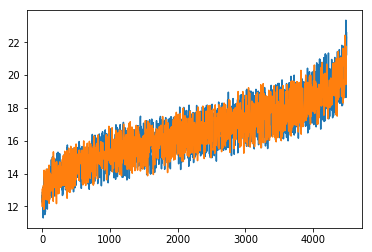

In [14]:
man= df[df['TransmissionType']=='manual']['Fuel']
auto=df[df['TransmissionType']=='automatic']['Fuel']
#fig =plt.figure(figsize=(10,7)
ax = sns.lineplot(data=man)
ax =sns.lineplot(data=auto)
print(man.mean())
print(auto.mean())

In [15]:
df_dummies=pd.get_dummies(df,columns=['TransmissionType','Season','Net'],drop_first=True)
df_dummies

Id     Payload  Reliability       Fuel    LoadValue  \
0        0  268.003362    88.942169  13.033955  1130.150394   
1        1  270.695677    86.018913  12.843801  1137.342936   
2        2  268.346849    85.945960  12.500423  1319.950261   
3        3  253.712697    87.986605  11.987058  1662.979622   
4        4  240.949546    83.871310  12.248381  1674.107415   
...    ...         ...          ...        ...          ...   
4488  4488  286.650265    48.145788  20.499798   480.183149   
4489  4489  284.634296    52.040528  22.343000   395.812446   
4490  4490  287.683624    53.786202  21.203045   694.418270   
4491  4491  294.161289    53.788311  21.763259   621.569829   
4492  4492  296.659754    53.726080  22.570595   556.507547   

      TransmissionType_manual  Season_1  Net_2  Net_3  
0                           0         0      0      1  
1                           1         0      0      1  
2                           0         0      0      1  
3                           0         0      0      1  
4                           1         0      0      1  
...                       ...       ...    ...    ...  
4488                        0         1      0      0  
4489                        1         1      0      0  
4490                        1         1      0      0  
4491                        1         1      0      0  
4492                        1         1      0      0  

[4493 rows x 9 columns]

## Model Building

#### 1. importing all packages and metrics needed

In [16]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

#### 2. Splitting into train and test

In [17]:
ro= round(df_dummies['Fuel'])
ro= ro.astype(int)

In [18]:
X=df_dummies.drop(columns=['Fuel'],axis=1)
y=ro

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

#### 3. Creating Instances for all the models

In [21]:
seed=42

# Creating Models

lr = LinearRegression()
lda = LinearDiscriminantAnalysis()
svc = SVC(random_state=seed, probability=True)
dtree = DecisionTreeRegressor(random_state=seed)
rf = RandomForestRegressor(10, random_state=seed)
gdb = GradientBoostingRegressor(random_state=seed)
adb = AdaBoostRegressor(random_state=seed)
xgb = XGBRegressor(random_state=seed)
knn = KNeighborsRegressor()
lgbm = LGBMRegressor(random_state=seed)

first_models = [ lr, lda, svc, dtree, 
                 rf, gdb, adb, xgb, knn, lgbm]
first_model_names = ['Linear Regression','LDA','SVM','Decision Tree', 
                     'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'XGB', 'K-Neighbors','Light GBM'] 
pred_col=[ 'lr', 'lda', 'svc', 'dtree', 
                 'rf', 'gdb', 'adb', 'xgb', 'knn', 'lgbm']
# Defining other steps

#### cv and standardization methods that will be called when model initiates

In [22]:
n_folds=10
skf= model_selection.ShuffleSplit(n_splits = n_folds, test_size = .25, train_size = .75, random_state = seed )
stan_sca= StandardScaler()

#### 5.Building the initial model  

In [23]:
from sklearn import metrics
model_predict=pd.DataFrame(index=X_test['Id'])
model_predict

Empty DataFrame
Columns: []
Index: [157, 2526, 1020, 1119, 731, 1237, 3593, 2992, 3268, 2439, 798, 1835, 438, 457, 4100, 3034, 3669, 602, 2312, 1345, 4091, 287, 2194, 1323, 3686, 1231, 1589, 3352, 1616, 4427, 915, 1001, 1534, 429, 718, 833, 1123, 3001, 810, 1113, 2341, 693, 297, 2045, 1643, 3562, 505, 4343, 2577, 2347, 1344, 1652, 2452, 1242, 1102, 2631, 3162, 23, 151, 3046, 1116, 199, 862, 680, 4210, 2309, 2916, 1726, 1074, 584, 2757, 2803, 1919, 1412, 4318, 1740, 478, 1672, 3201, 2804, 4208, 2414, 677, 1448, 2942, 3013, 4125, 4483, 2989, 4065, 2742, 3516, 3753, 3200, 2178, 1204, 2088, 4403, 2677, 1831, ...]

[1124 rows x 0 columns]

In [24]:
models_compare_df_columns= ['Model Name','Train score first','Test score first','RMSE first','R2 first']
models_compare_df= pd.DataFrame(columns=models_compare_df_columns)
#model_predict=df[['Id']]

#train_size = X.shape[0]
#n_models = len(first_models)
#oof_pred = np.zeros((train_size, n_models))
row_index=0
scores=[]

for n,model in enumerate(first_models):
    model_pipeline= Pipeline(steps=[('Scalar',stan_sca),
                                   ('estimator',model)])
    Model_name=model.__class__.__name__
    models_compare_df.loc[row_index,'Model Name']=Model_name
    
    
    cv_results=model_selection.cross_validate(model,X_train,y_train,cv=skf,return_train_score=True)
    
    models_compare_df.loc[row_index,'Train score first']=cv_results['train_score'].mean()
    models_compare_df.loc[row_index,'Test score first']=cv_results['test_score'].mean()
    
    
    model_pipeline.fit(X_train,y_train)
    model_predict[Model_name]=model_pipeline.predict(X_test)
    
    rmse_val=np.sqrt(metrics.mean_squared_error(y_test,model_predict[Model_name]))
    models_compare_df.loc[row_index,'RMSE first']=rmse_val
    
    r2_val= metrics.r2_score(y_test,model_predict[Model_name])
    models_compare_df.loc[row_index,'R2 first']=r2_val
    
    row_index+=1

[17:00:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [25]:
model_predict

LinearRegression  LinearDiscriminantAnalysis  SVC  \
Id                                                        
157          14.009338                          14   14   
2526         17.113605                          17   17   
1020         14.694157                          15   15   
1119         14.887392                          15   15   
731          14.489620                          15   15   
...                ...                         ...  ...   
2696         17.205637                          17   17   
3416         17.828820                          17   18   
1272         14.920102                          15   15   
3662         17.921934                          18   18   
1694         15.216997                          15   15   

      DecisionTreeRegressor  RandomForestRegressor  GradientBoostingRegressor  \
Id                                                                              
157                    13.0                   14.1                  13.989480   
2526                   17.0                   16.7                  16.862024   
1020                   15.0                   15.1                  15.074296   
1119                   15.0                   15.0                  15.087403   
731                    16.0                   14.6                  14.958426   
...                     ...                    ...                        ...   
2696                   17.0                   17.1                  17.142723   
3416                   17.0                   17.7                  17.776215   
1272                   15.0                   15.1                  15.127735   
3662                   19.0                   18.8                  17.948204   
1694                   15.0                   15.5                  15.308909   

      AdaBoostRegressor  XGBRegressor  KNeighborsRegressor  LGBMRegressor  
Id                                                                         
157           14.026846     13.949791                 14.0      14.015090  
2526          16.800582     16.871534                 16.2      16.942318  
1020          14.925980     15.042246                 14.8      15.089058  
1119          14.962121     15.088247                 14.8      15.058496  
731           14.781106     14.976113                 14.8      15.151720  
...                 ...           ...                  ...            ...  
2696          17.121306     17.145840                 17.2      17.158320  
3416          17.663350     17.775381                 18.0      17.771605  
1272          15.206731     15.127199                 15.4      15.257982  
3662          17.682959     17.955090                 18.0      18.855090  
1694          15.297114     15.320404                 15.8      15.507919  

[1124 rows x 10 columns]

In [26]:
models_compare_df.sort_values(by = ['Test score first'], ascending = False, inplace = True)
models_compare_df

Model Name Train score first Test score first RMSE first  \
7                XGBRegressor          0.868598         0.835793    0.70815   
5   GradientBoostingRegressor          0.870395         0.835288   0.708643   
6           AdaBoostRegressor          0.842296         0.829051   0.731063   
0            LinearRegression          0.832109         0.825634   0.731343   
9               LGBMRegressor          0.919117          0.82041   0.730222   
4       RandomForestRegressor          0.967724         0.804319   0.755331   
8         KNeighborsRegressor          0.821258         0.728109   0.792626   
3       DecisionTreeRegressor                 1         0.669339    1.02548   
1  LinearDiscriminantAnalysis          0.463856         0.454211   0.810847   
2                         SVC          0.395289           0.3879   0.813039   

   R2 first  
7  0.862017  
5  0.861825  
6  0.852943  
0  0.852831  
9  0.853282  
4  0.843018  
8  0.827133  
3  0.710648  
1  0.819094  
2  0.818115

#### 6.Feature Importance

In [27]:
feature_names= X.columns
feature_df= pd.DataFrame(columns=first_model_names,index=feature_names)

In [28]:
feature_df.drop(['SVM','K-Neighbors'], axis=1, inplace=True)

In [29]:
feature_df.drop(['LDA'], axis=1, inplace=True)

In [30]:
feature_df['Linear Regression'] = np.abs(lr.coef_.ravel())
feature_df['Decision Tree'] = dtree.feature_importances_
feature_df['Random Forest'] = rf.feature_importances_
feature_df['GradientBoosting'] = gdb.feature_importances_
feature_df['AdaBoost'] = adb.feature_importances_
feature_df['XGB'] = xgb.feature_importances_
feature_df['Light GBM'] = lgbm.feature_importances_

In [31]:
feature_df

Linear Regression  Decision Tree  Random Forest  \
Id                                0.879144       0.246124       0.246990   
Payload                           0.020570       0.040929       0.037805   
Reliability                       0.089566       0.037170       0.037281   
LoadValue                         0.030917       0.036803       0.037941   
TransmissionType_manual           0.002603       0.003948       0.004047   
Season_1                          0.118492       0.000058       0.000129   
Net_2                             0.889966       0.035284       0.034441   
Net_3                             1.476595       0.599683       0.601366   

                         GradientBoosting  AdaBoost       XGB  Light GBM  
Id                               0.288030  0.213921  0.034677        715  
Payload                          0.005542  0.001112  0.001172        739  
Reliability                      0.003912  0.000000  0.001659        678  
LoadValue                        0.006932  0.001571  0.001338        741  
TransmissionType_manual          0.000033  0.000000  0.000000         57  
Season_1                         0.000000  0.000000  0.000000          0  
Net_2                            0.037012  0.043590  0.008022         34  
Net_3                            0.658538  0.739807  0.953132         36

In [32]:
#since LGBM has different scale of values, we should use minmax to bring down its scale

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

scaled_features = pd.DataFrame(data=min_max.fit_transform(feature_df),
                         columns=feature_df.columns,
                         index=feature_df.index)
scaled_features['Overall'] = scaled_features.sum(axis=1)

ordered_features_ranking = scaled_features.sort_values('Overall', ascending=False)
ordered_features_ranking

Linear Regression  Decision Tree  Random Forest  \
Net_3                             1.000000       1.000000       1.000000   
Id                                0.594671       0.410367       0.410588   
LoadValue                         0.019209       0.061281       0.062889   
Payload                           0.012190       0.068162       0.062663   
Reliability                       0.058998       0.061892       0.061792   
Net_2                             0.602013       0.058747       0.057068   
TransmissionType_manual           0.000000       0.006488       0.006517   
Season_1                          0.078622       0.000000       0.000000   

                         GradientBoosting  AdaBoost       XGB  Light GBM  \
Net_3                            1.000000  1.000000  1.000000   0.048583   
Id                               0.437378  0.289158  0.036382   0.964912   
LoadValue                        0.010527  0.002123  0.001404   1.000000   
Payload                          0.008416  0.001503  0.001230   0.997301   
Reliability                      0.005941  0.000000  0.001740   0.914980   
Net_2                            0.056204  0.058920  0.008416   0.045884   
TransmissionType_manual          0.000051  0.000000  0.000000   0.076923   
Season_1                         0.000000  0.000000  0.000000   0.000000   

                          Overall  
Net_3                    6.048583  
Id                       3.143456  
LoadValue                1.157433  
Payload                  1.151464  
Reliability              1.105343  
Net_2                    0.887252  
TransmissionType_manual  0.089978  
Season_1                 0.078622

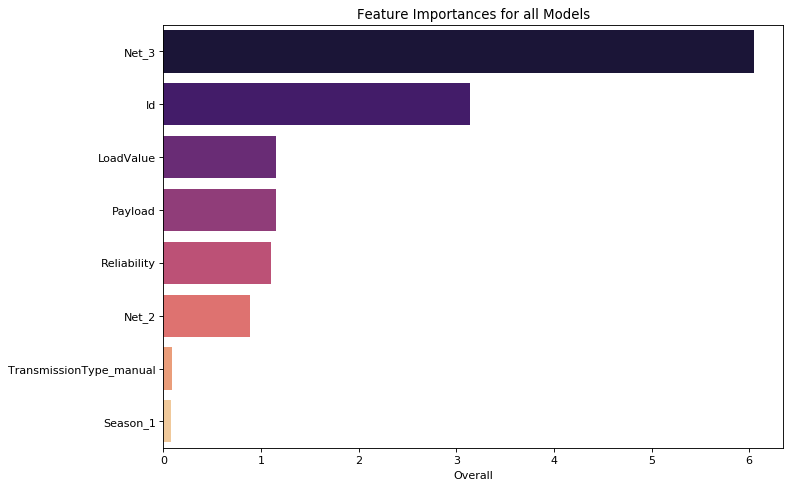

In [33]:
#plotting feature importance
fig, ax = plt.subplots(figsize=(10,7), dpi=80)

sns.barplot(data=ordered_features_ranking, y=ordered_features_ranking.index, x='Overall', palette='magma')
ax.set_title('Feature Importances for all Models');

#### 7. Initializing model with only important features

In [34]:
X_1=X_train.drop(columns=['Season_1','TransmissionType_manual','Id'],axis=1)
y_1=y_train
X_test2=X_test.drop(columns=['Season_1','TransmissionType_manual','Id'],axis=1)

In [35]:
model_predict_2=pd.DataFrame(index=X_test['Id'])


In [36]:
models_compare_df_columns2= ['Model Name','Train score second','Test score second','RMSE second','R2 second']
models_compare_df2= pd.DataFrame(columns=models_compare_df_columns2)
#model_predict=pd.DataFrame(columns=first_model_names,index=X_test['Id'])

#train_size = X.shape[0]
#n_models = len(first_models)
#oof_pred = np.zeros((train_size, n_models))
row_index=0
scores=[]

for n,model in enumerate(first_models):
    model_pipeline= Pipeline(steps=[('Scalar',stan_sca),
                                   ('estimator',model)])
    
    Model_name_2=model.__class__.__name__
    models_compare_df2.loc[row_index,'Model Name']=Model_name_2
    
    cv_results_2=model_selection.cross_validate(model,X_1,y_1,cv=skf,return_train_score=True)
    
    models_compare_df2.loc[row_index,'Train score second']=cv_results_2['train_score'].mean()
    models_compare_df2.loc[row_index,'Test score second']=cv_results_2['test_score'].mean()
    
    
    model_pipeline.fit(X_1,y_1)
    model_predict_2[Model_name_2]=model_pipeline.predict(X_test2)
    
    rmse_val_2=np.sqrt(metrics.mean_squared_error(y_test,model_predict_2[Model_name_2]))
    models_compare_df2.loc[row_index,'RMSE second']=rmse_val_2
    
    r2_val_2= metrics.r2_score(y_test,model_predict_2[Model_name_2])
    models_compare_df2.loc[row_index,'R2 second']=r2_val_2
    
    row_index+=1

[17:00:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [37]:
models_compare_df2.sort_values(by = ['Test score second'], ascending = False, inplace = True)
models_compare_df2

Model Name Train score second Test score second  \
0            LinearRegression           0.791727          0.786771   
7                XGBRegressor           0.822294          0.784441   
5   GradientBoostingRegressor           0.825285          0.784219   
6           AdaBoostRegressor           0.788614          0.777409   
9               LGBMRegressor           0.880275          0.763658   
4       RandomForestRegressor           0.956411          0.740902   
3       DecisionTreeRegressor                  1          0.569224   
8         KNeighborsRegressor           0.677066          0.498568   
1  LinearDiscriminantAnalysis           0.414252          0.409846   
2                         SVC            0.25578          0.261091   

  RMSE second R2 second  
0    0.814054   0.81766  
7    0.823524  0.813393  
5    0.823111   0.81358  
6    0.825869  0.812329  
9      0.8545  0.799091  
4    0.896945  0.778636  
3     1.18224  0.615422  
8    0.900455  0.776901  
1    0.881805  0.786046  
2     0.91498  0.769645

In [38]:
model_predict_2

LinearRegression  LinearDiscriminantAnalysis  SVC  \
Id                                                        
157          13.924942                          14   14   
2526         17.441905                          17   17   
1020         14.383543                          15   15   
1119         15.164517                          15   15   
731          14.419898                          15   15   
...                ...                         ...  ...   
2696         17.295697                          17   17   
3416         18.028953                          18   18   
1272         14.567044                          15   15   
3662         17.661536                          17   17   
1694         14.995838                          15   15   

      DecisionTreeRegressor  RandomForestRegressor  GradientBoostingRegressor  \
Id                                                                              
157                    15.0                   14.1                  13.986796   
2526                   16.0                   17.1                  17.352345   
1020                   15.0                   13.5                  14.348668   
1119                   15.0                   14.8                  15.118291   
731                    15.0                   14.7                  14.401604   
...                     ...                    ...                        ...   
2696                   17.0                   17.2                  17.269129   
3416                   18.0                   18.3                  18.320085   
1272                   13.0                   14.4                  14.632244   
3662                   19.0                   18.4                  17.702732   
1694                   15.0                   15.3                  15.075652   

      AdaBoostRegressor  XGBRegressor  KNeighborsRegressor  LGBMRegressor  
Id                                                                         
157           13.669604     13.948908                 14.2      14.211829  
2526          17.515625     17.349382                 17.6      17.262959  
1020          14.369650     14.342831                 13.8      14.034706  
1119          14.962555     15.129630                 14.8      15.147596  
731           14.369650     14.415128                 14.6      14.743978  
...                 ...           ...                  ...            ...  
2696          17.515625     17.287487                 18.0      17.635646  
3416          18.144154     18.336535                 18.0      18.168232  
1272          14.410550     14.637891                 13.8      14.373004  
3662          17.887500     17.717791                 17.6      18.179517  
1694          14.928222     15.071924                 15.6      15.254426  

[1124 rows x 10 columns]

In [39]:
compare_first_second= pd.concat([models_compare_df,models_compare_df2],axis=1)
compare_first_second

Model Name Train score first Test score first RMSE first  \
0            LinearRegression          0.832109         0.825634   0.731343   
1  LinearDiscriminantAnalysis          0.463856         0.454211   0.810847   
2                         SVC          0.395289           0.3879   0.813039   
3       DecisionTreeRegressor                 1         0.669339    1.02548   
4       RandomForestRegressor          0.967724         0.804319   0.755331   
5   GradientBoostingRegressor          0.870395         0.835288   0.708643   
6           AdaBoostRegressor          0.842296         0.829051   0.731063   
7                XGBRegressor          0.868598         0.835793    0.70815   
8         KNeighborsRegressor          0.821258         0.728109   0.792626   
9               LGBMRegressor          0.919117          0.82041   0.730222   

   R2 first                  Model Name Train score second Test score second  \
0  0.852831            LinearRegression           0.791727          0.786771   
1  0.819094  LinearDiscriminantAnalysis           0.414252          0.409846   
2  0.818115                         SVC            0.25578          0.261091   
3  0.710648       DecisionTreeRegressor                  1          0.569224   
4  0.843018       RandomForestRegressor           0.956411          0.740902   
5  0.861825   GradientBoostingRegressor           0.825285          0.784219   
6  0.852943           AdaBoostRegressor           0.788614          0.777409   
7  0.862017                XGBRegressor           0.822294          0.784441   
8  0.827133         KNeighborsRegressor           0.677066          0.498568   
9  0.853282               LGBMRegressor           0.880275          0.763658   

  RMSE second R2 second  
0    0.814054   0.81766  
1    0.881805  0.786046  
2     0.91498  0.769645  
3     1.18224  0.615422  
4    0.896945  0.778636  
5    0.823111   0.81358  
6    0.825869  0.812329  
7    0.823524  0.813393  
8    0.900455  0.776901  
9      0.8545  0.799091

In [40]:
compare_first_second.sort_values(by = ['RMSE second'], ascending = False, inplace = True)

In [41]:
compare_first_second

Model Name Train score first Test score first RMSE first  \
3       DecisionTreeRegressor                 1         0.669339    1.02548   
2                         SVC          0.395289           0.3879   0.813039   
8         KNeighborsRegressor          0.821258         0.728109   0.792626   
4       RandomForestRegressor          0.967724         0.804319   0.755331   
1  LinearDiscriminantAnalysis          0.463856         0.454211   0.810847   
9               LGBMRegressor          0.919117          0.82041   0.730222   
6           AdaBoostRegressor          0.842296         0.829051   0.731063   
7                XGBRegressor          0.868598         0.835793    0.70815   
5   GradientBoostingRegressor          0.870395         0.835288   0.708643   
0            LinearRegression          0.832109         0.825634   0.731343   

   R2 first                  Model Name Train score second Test score second  \
3  0.710648       DecisionTreeRegressor                  1          0.569224   
2  0.818115                         SVC            0.25578          0.261091   
8  0.827133         KNeighborsRegressor           0.677066          0.498568   
4  0.843018       RandomForestRegressor           0.956411          0.740902   
1  0.819094  LinearDiscriminantAnalysis           0.414252          0.409846   
9  0.853282               LGBMRegressor           0.880275          0.763658   
6  0.852943           AdaBoostRegressor           0.788614          0.777409   
7  0.862017                XGBRegressor           0.822294          0.784441   
5  0.861825   GradientBoostingRegressor           0.825285          0.784219   
0  0.852831            LinearRegression           0.791727          0.786771   

  RMSE second R2 second  
3     1.18224  0.615422  
2     0.91498  0.769645  
8    0.900455  0.776901  
4    0.896945  0.778636  
1    0.881805  0.786046  
9      0.8545  0.799091  
6    0.825869  0.812329  
7    0.823524  0.813393  
5    0.823111   0.81358  
0    0.814054   0.81766

**a.RMSE values are less in the first model compared to the model with only important features**

**b.In the first model,Diverse and best performing algorithms are:1.Gradient Boosting 
                                                                  2.Linear Regression 
                                                                  3.Random forest**

#### 8.Parameter Tuning

##### --Decision Tree--

In [42]:
# Importing Randomizedsearchcv and finding out optimal parameters for Decision Tree
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': np.arange(1,20),
          'criterion':['mse','mae']}
dt = DecisionTreeRegressor()
dt_ = RandomizedSearchCV(dt, params, cv=5 , return_train_score = True) 
dt_.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [43]:
dt_.best_params_

{'max_depth': 3, 'criterion': 'mae'}

##### --Random forest-- 

In [44]:
rf = RandomForestRegressor()
params1 = {'n_estimators': np.arange(1,20),
           'criterion':['mse','mae']}
rf_ = RandomizedSearchCV(rf, params, cv=5, return_train_score = True) 
rf_.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [45]:
rf_.best_params_

{'max_depth': 4, 'criterion': 'mae'}

##### --KNeighbours-- 

In [46]:
# Finding optimal parameters using Randomized Search CV
params3 = {'leaf_size':np.arange(1,50),
           'n_neighbors':np.arange(1,30),
           'p':[1,2]}
knn = KNeighborsRegressor()
knn_ = RandomizedSearchCV(knn, params3, cv=3 , return_train_score = True) # RandomizedSearchCV
knn_.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
              

In [47]:
knn_.best_params_

{'p': 2, 'n_neighbors': 24, 'leaf_size': 33}

###### --AdaBoost--

In [48]:
params4 = {"n_estimators": range(5,20,2) ,  
            "learning_rate": [0.01,0.05,0.1,0.5,1],
           'loss':['linear','square','exponential']}
 
ab = AdaBoostRegressor()
AB = RandomizedSearchCV(ab,param_distributions=params4,
                           cv = 5,
                           n_jobs=-1,
                           verbose=2)
AB.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': range(5, 20, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [49]:
AB.best_params_

{'n_estimators': 15, 'loss': 'exponential', 'learning_rate': 1}

##### -- GradientBoost--

In [50]:
param_grid1 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
 
gb = GradientBoostingRegressor()
GB = RandomizedSearchCV(gb,param_distributions=param_grid1,
                           cv = 5,
                           n_jobs=-1,
                           verbose=2)
GB.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [51]:
GB.best_params_

{'n_estimators': 13, 'learning_rate': 1}

##### -- XGBoost--

In [52]:
param_grid1 = {"max_depth": [10,15,20,30],
              "n_estimators": range(5,20,2) , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.01,0.05]}
 
xgb=XGBRegressor()
XGB = RandomizedSearchCV(xgb,param_distributions=param_grid1,
                           cv = 5)
XGB.fit(X,y)

[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [53]:
XGB.best_params_

{'n_estimators': 11, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.03}

##### --SVM--

In [54]:
#params2 = {'kernel':['linear','rbf'],
 #          'C': [0.01, 1],
  #         'gamma': [0.01,0.1]}
#svr = SVC()
#svr_ = RandomizedSearchCV(svr, params2, cv=3 , return_train_score = True) # RandomizedSearchCV
#svr_.fit(X,y)

In [55]:
#svr_.best_params_

#### 9.Modelling with hyperparameter tuned values

In [62]:
lr1 = LinearRegression()
lda1 = LinearDiscriminantAnalysis()
svc1 = SVC(random_state=seed, probability=True)
dtree1 = DecisionTreeRegressor(max_depth= 3, criterion= 'mae',random_state=seed)
rf1 = RandomForestRegressor(max_depth= 4, criterion= 'mae', random_state=seed)
gdb1 = GradientBoostingRegressor(n_estimators= 13, learning_rate=1, random_state=seed)
adb1 = AdaBoostRegressor(n_estimators= 15, loss= 'exponential', learning_rate=1,random_state=seed)
xgb1 = XGBRegressor(n_estimators= 11, max_depth= 15, learning_rate= 0.05, gamma= 0.03,random_state=seed)
knn1 = KNeighborsRegressor(p= 2, n_neighbors= 24, leaf_size= 33,)
lgbm1 = LGBMRegressor(random_state=seed)

first_models_after_tune = [ lr1, lda1, svc1, dtree1, 
                 rf1, gdb1, adb1, xgb1, knn1, lgbm1]
first_model_names = ['Linear Regression','LDA','SVM','Decision Tree', 
                     'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'XGB', 'K-Neighbors','Light GBM'] 
pred_col=[ 'lr', 'lda', 'svc', 'dtree', 
                 'rf', 'gdb', 'adb', 'xgb', 'knn', 'lgbm']
# Defining other steps

In [57]:
from sklearn import metrics
model_predict_after_tune=pd.DataFrame(index=X_test['Id'])


In [63]:
models_compare_df_columns= ['Model Name','Train score after tune','Test score after tune','RMSE after tune','R2 after tune']
models_compare_df_after_tune= pd.DataFrame(columns=models_compare_df_columns)
#model_predict=df[['Id']]

#train_size = X.shape[0]
#n_models = len(first_models)
#oof_pred = np.zeros((train_size, n_models))
row_index=0
scores=[]

for n,model in enumerate(first_models_after_tune):
    model_pipeline_2= Pipeline(steps=[('Scalar',stan_sca),
                                   ('estimator',model)])
    Model_name2=model.__class__.__name__
    models_compare_df_after_tune.loc[row_index,'Model Name']=Model_name2
    
    
    cv_results=model_selection.cross_validate(model,X_train,y_train,cv=skf,return_train_score=True)
    
    models_compare_df_after_tune.loc[row_index,'Train score after tune']=cv_results['train_score'].mean()
    models_compare_df_after_tune.loc[row_index,'Test score after tune']=cv_results['test_score'].mean()
    
    model_pipeline_2.fit(X_train,y_train)
    model_predict_after_tune[Model_name2]=model_pipeline_2.predict(X_test)
    
    rmse_val_2=np.sqrt(metrics.mean_squared_error(y_test,model_predict_after_tune[Model_name2]))
    models_compare_df_after_tune.loc[row_index,'RMSE after tune']=rmse_val_2
    
    r2_val_2= metrics.r2_score(y_test,model_predict_after_tune[Model_name2])
    models_compare_df_after_tune.loc[row_index,'R2 after tune']=r2_val_2
    
    row_index+=1

[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [59]:
model_pipeline

Pipeline(memory=None,
         steps=[('Scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, importance_type='split',
                               learning_rate=0.1, max_depth=-1,
                               min_child_samples=20, min_child_weight=0.001,
                               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=42,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=1.0, subsample_for_bin=200000,
                               subsample_freq=0))],
         verbose=False)

In [64]:
models_compare_df_after_tune.sort_values(by='RMSE after tune',ascending=False,inplace=True)
models_compare_df_after_tune

Model Name Train score after tune Test score after tune  \
7                XGBRegressor               -23.7195              -24.2026   
2                         SVC               0.395289                0.3879   
1  LinearDiscriminantAnalysis               0.463856              0.454211   
3       DecisionTreeRegressor               0.807981              0.795542   
8         KNeighborsRegressor               0.786872                 0.763   
4       RandomForestRegressor               0.834177              0.817755   
5   GradientBoostingRegressor               0.867506              0.813976   
0            LinearRegression               0.832109              0.825634   
9               LGBMRegressor               0.919117               0.82041   
6           AdaBoostRegressor               0.841933              0.829647   

  RMSE after tune R2 after tune  
7         9.21495      -22.3647  
2        0.813039      0.818115  
1        0.810847      0.819094  
3        0.787469      0.829376  
8        0.762099      0.840192  
4        0.753775      0.843664  
5        0.748757      0.845739  
0        0.731343      0.852831  
9        0.730222      0.853282  
6         0.72692      0.854605

In [65]:
#concatinating 

concat_one_three= pd.concat([models_compare_df,models_compare_df_after_tune],axis=1)
concat_one_three

Model Name Train score first Test score first RMSE first  \
0            LinearRegression          0.832109         0.825634   0.731343   
1  LinearDiscriminantAnalysis          0.463856         0.454211   0.810847   
2                         SVC          0.395289           0.3879   0.813039   
3       DecisionTreeRegressor                 1         0.669339    1.02548   
4       RandomForestRegressor          0.967724         0.804319   0.755331   
5   GradientBoostingRegressor          0.870395         0.835288   0.708643   
6           AdaBoostRegressor          0.842296         0.829051   0.731063   
7                XGBRegressor          0.868598         0.835793    0.70815   
8         KNeighborsRegressor          0.821258         0.728109   0.792626   
9               LGBMRegressor          0.919117          0.82041   0.730222   

   R2 first                  Model Name Train score after tune  \
0  0.852831            LinearRegression               0.832109   
1  0.819094  LinearDiscriminantAnalysis               0.463856   
2  0.818115                         SVC               0.395289   
3  0.710648       DecisionTreeRegressor               0.807981   
4  0.843018       RandomForestRegressor               0.834177   
5  0.861825   GradientBoostingRegressor               0.867506   
6  0.852943           AdaBoostRegressor               0.841933   
7  0.862017                XGBRegressor               -23.7195   
8  0.827133         KNeighborsRegressor               0.786872   
9  0.853282               LGBMRegressor               0.919117   

  Test score after tune RMSE after tune R2 after tune  
0              0.825634        0.731343      0.852831  
1              0.454211        0.810847      0.819094  
2                0.3879        0.813039      0.818115  
3              0.795542        0.787469      0.829376  
4              0.817755        0.753775      0.843664  
5              0.813976        0.748757      0.845739  
6              0.829647         0.72692      0.854605  
7              -24.2026         9.21495      -22.3647  
8                 0.763        0.762099      0.840192  
9               0.82041        0.730222      0.853282

**Gradientboost first,Linear Regression,Random forest after tune are the top 3 best performing and diverse algorithms**

#### 10. Voting Regressor

In [66]:
vote_est=[('gdb',gdb),('lr',lr),('rf1',rf1)]

In [68]:
from sklearn.ensemble import VotingRegressor
vote = VotingRegressor(estimators=vote_est)
vote.fit(X_train,y_train)

VotingRegressor(estimators=[('gdb',
                             GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                   

In [69]:
vote_pred = vote.predict(X_test)

In [73]:
vote_rmse = np.sqrt(metrics.mean_squared_error(vote_pred,y_test))
print('vote_rmse:',vote_rmse)
vote_r2score = metrics.r2_score(vote_pred,y_test)
print('vote_r2score:',vote_r2score)
vote_train = vote.score(X_train,y_train)
print('vote_train:',vote_train)
vote_test = vote.score(X_test,y_test)
print('vote_test:',vote_test)

vote_rmse: 0.7104531466511755
vote_r2score: 0.8280468230294524
vote_train: 0.8514263785435027
vote_test: 0.8611181436100926


#### 11.MLxtend Stacking Regressor

In [74]:
from mlxtend.regressor import StackingRegressor
lr=LinearRegression()
rf1 = RandomForestRegressor(max_depth= 4, criterion= 'mae', random_state=seed)
gdb = GradientBoostingRegressor()

In [76]:
st_r = StackingRegressor(regressors=[lr,rf1,gdb],meta_regressor=lr)
st_r.fit(X_train,y_train)

StackingRegressor(meta_regressor=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  refit=True,
                  regressors=[LinearRegression(copy_X=True, fit_intercept=True,
                                               n_jobs=None, normalize=False),
                              RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mae',
                                                    max_depth=4,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_...
   

In [77]:
st_pred = st_r.predict(X_test)

In [78]:
st_rmse = np.sqrt(metrics.mean_squared_error(st_pred,y_test))
print('vote_rmse:',st_rmse)
st_r2score = metrics.r2_score(st_pred,y_test)
print('vote_r2score:',st_r2score)
st_train = st_r.score(X_train,y_train)
print('vote_train:',st_train)
st_test = st_r.score(X_test,y_test)
print('vote_test:',st_test)

vote_rmse: 0.7250701527733825
vote_r2score: 0.8286862047076209
vote_train: 0.8678848581544701
vote_test: 0.8553445886634845


In [80]:
# Comparing two regressor models 

metrics_stack = {'Models': ['Voting Regressor','Stacking Regressor'],
                 'RMSE score':[vote_rmse,st_rmse],
                 'R2 Score':[vote_rmse,st_rmse],
                 'Train score':[vote_train,st_train],
                 'Test score':[vote_test,st_test]}

metrics_stack = pd.DataFrame(metrics_stack)
metrics_stack

Models  RMSE score  R2 Score  Train score  Test score
0    Voting Regressor    0.710453  0.710453     0.851426    0.861118
1  Stacking Regressor    0.725070  0.725070     0.867885    0.855345

**Voting Regressor is a better model compared to stacking regressor**

#### 12.Vecstack Regressor

In [82]:
from vecstack import stacking
models = [lr,rf1,gdb]
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = True, metric = metrics.r2_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.83873415]
    fold  1:  [0.80407917]
    fold  2:  [0.83678938]
    fold  3:  [0.83520133]
    ----
    MEAN:     [0.82870101] + [0.01427038]
    FULL:     [0.82973326]

model  1:     [RandomForestRegressor]
    fold  0:  [0.82963276]
    fold  1:  [0.80283574]
    fold  2:  [0.82902615]
    fold  3:  [0.83046297]
    ----
    MEAN:     [0.82298941] + [0.01164690]
    FULL:     [0.82388234]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.85122674]
    fold  1:  [0.81052013]
    fold  2:  [0.84800567]
    fold  3:  [0.84405703]
    ----
    MEAN:     [0.83845239] + [0.01632538]
    FULL:     [0.83958361]



**GradientBoost is the best among these 3 models**

In [83]:
models = [knn1,xgb,adb]
S_train, S_test = stacking(models, X_train, y_train, X_test, 
    regression = True, metric = metrics.r2_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsRegressor]
    fold  0:  [0.78133525]
    fold  1:  [0.73056825]
    fold  2:  [0.76609788]
    fold  3:  [0.78274097]
    ----
    MEAN:     [0.76518559] + [0.02102496]
    FULL:     [0.76683805]

model  1:     [XGBRegressor]
[17:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    fold  0:  [0.85130697]
[17:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    fold  1:  [0.81061251]
[17:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    fold  2:  [0.84713781]
[17:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
    fold  3:  [0.84459542]
    ----
    MEAN:     [0.83841318] + [0.01622858]
    FULL:     [0.83955505

**XGB,Ada both are good models**